# Task # 2 - To Explore Supervised Machine Learning

Problem Statement - To predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

What will be predicted score if a student study for 9.25 hrs in a day?

# Importing Relevant Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

# Loading Dataset

In [11]:
data_link = ("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data = pd.read_csv(data_link)

# Dataset Overview

In [12]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Preprocessing 
# Checking For Null Values, Missing Values, Shape and Data-type 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [14]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [15]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Exploring the PDFs Of Variables

Text(0.5, 1.0, 'Score Dsitribution')

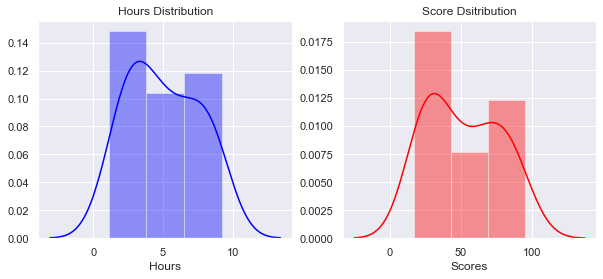

In [78]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
p1 = sns.distplot(data['Hours'],label='Hours',color='blue')
plt.title('Hours Distribution')
plt.subplot(1,2,2)
p2 = sns.distplot(data['Scores'],label='Scores',color='red')
plt.title('Score Dsitribution')

# Correlation In Variables 

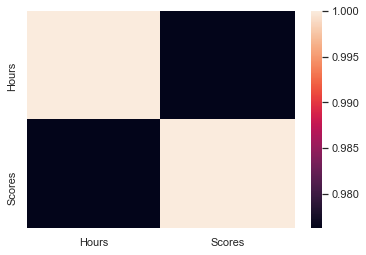

In [17]:
sns.heatmap(data.corr())

AS WE CAN SEE THEY ARE POSITIVELY CORRELATED

# The OLS Assumptions


# 1. Linearity

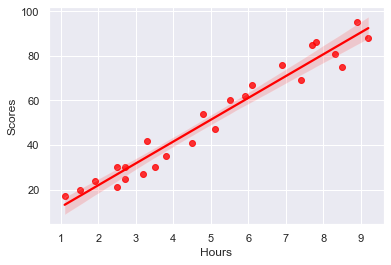

In [18]:
sns.regplot(x=data['Hours'],y=data['Scores'],color='red')

AS WE SEE THE LINEARITY IN THIS PLOT. HENCE LINEAR.

# 2. Normality And Homoscedasticity

AS WE CAN SEE FROM PDFs OF VARIABLES THAT IT FOLLOWS NORAMLITY AND HOMOSCEDASTICITY

# 3. No Autocorrelation 
AS THE DATASET IS NOT FROM TIME-SERIES OR PANEL DATA, EACH ROW IS DIFFERENT  

# 4. No Multicollinearity 
AS WE ARE PERFORMING SIMPLE LINEAR REGRESSION.

# Declare The Inputs And Targets

In [19]:
y = data.iloc[:, 1]
x = data.iloc[:, :-1]

# Train-Test Split


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=365)

# Linear Regression Model

In [27]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Training The Model

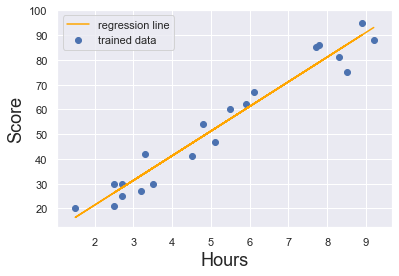

In [39]:
yhat = (reg.coef_*x_train )+reg.intercept_
plt.plot(x_train,yhat,c='orange',label='regression line')
plt.scatter(x_train,y_train,label='trained data')
plt.xlabel('Hours',fontsize=18)
plt.ylabel('Score',fontsize=18)
plt.legend()

# Prediction

In [29]:
prediction = reg.predict(x_test)
prediction

array([39.2597796 , 20.34033368, 70.12834927, 75.10715083, 12.37425119])

# Comparing Actual And Predicted Values

In [56]:
compare = pd.DataFrame({'Actual':y_test})
compare.reset_index(drop=True,inplace=True)
compare['Predicted']=prediction
compare['Deviation']=abs(compare['Actual']-compare['Predicted'])
compare

,Actual,Predicted,Deviation
0,35,39.259780,4.259780
1,24,20.340334,3.659666
2,76,70.128349,5.871651
3,69,75.107151,6.107151
4,17,12.374251,4.625749


# Visualizing The Deviation 

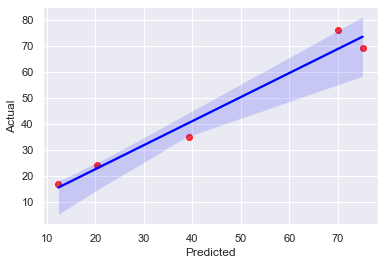

In [37]:
sns.regplot('Predicted','Actual',data=compare,line_kws={'color':'blue'},scatter_kws={'color':'red'})

# Evaluating The Model 

# 1. Using Mean Absolute Error

In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(prediction , y_test)
RMSE = np.sqrt(mean_squared_error(prediction , y_test))
print('Mean Absolute Error = ',MAE.round(3))
print('Root Mean Squared Error = ',RMSE.round(3))

Mean Absolute Error =  4.905
Root Mean Squared Error =  4.994


# 2. Using R-Squared

In [62]:
r2=reg.score(x,y)
n=x_test.shape[0]
p=x_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('R-Squared = ',r2.round(3))
print('adjusted_r2 = ',adjusted_r2.round(3))

R-Squared =  0.953
adjusted_r2 =  0.937


# Result

In [83]:
n = float(input())
Score = reg.predict([[n]])
print ('After Studying For {} Hours, The Estimated Score Should be {}'.format(n,Score.round(2)))

9.25
After Studying For 9.25 Hours, The Estimated Score Should be [93.53]
